In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_context('paper')
sns.set(font_scale=1.5)

In [3]:
records = np.load('/artemis/readout/archive/2016-12-21-stanford-almn-res2-noise.npz')['records']

In [5]:
records.shape

(6,)

In [9]:
keys = records.dtype.fields.keys()

In [13]:
keys

['res_f_min_error',
 'S_counts',
 'res_Q_e_real',
 'res_frequency_data',
 'res_Q_error',
 'sweep.root_path',
 'number',
 'res_delay_error',
 'sweep.node_path',
 'res_model_s21',
 'res_f_0_error',
 'S_yy_variance',
 'start_epoch',
 'roach_modulation_output',
 'res_Q_e_real_error',
 'res_f_min',
 'S_xx_variance',
 'index',
 'S_xx',
 'S_xy',
 'res_phi_error',
 'roach_heterodyne',
 'roach_num_tone_samples',
 'stream.root_path',
 'res_f_0',
 'roach_hardware_delay_samples',
 'res_model_s21_at_f_0',
 'res_model_frequency',
 'res_redchi',
 'roach_adc_sample_rate',
 'res_A_slope_error',
 'res_Q_i',
 'res_A_mag',
 'res_Q_e',
 'roach_reference_sequence_number',
 'res_model_s21_normalized',
 'package_temperature',
 'res_Q_e_imag_error',
 'res_A_slope',
 'roach_lo_frequency',
 'res_Q_e_imag',
 'analysis_epoch',
 'res_Q',
 'res_delay',
 'roach_num_tones',
 'stream.node_path',
 'io_class',
 'res_s21_data_normalized',
 'res_A_mag_error',
 'S_yy',
 'res_phi',
 'res_model_s21_normalized_at_f_0',
 'a_bif

In [10]:
[x for x in keys if x.startswith('S')]

['S_counts',
 'S_yy_variance',
 'S_xx_variance',
 'S_xx',
 'S_xy',
 'S_yy',
 'S_frequency']

In [413]:
records['res_f_0']

array([  1.44559241e+08,   1.44559105e+08,   1.44560729e+08,
         1.44560617e+08,   1.44560596e+08,   1.44560759e+08])

In [23]:
records['sweep.node_path']

array([None, None, None, None, None, None], dtype=object)

In [19]:
records['package_temperature']

array([ 0.11396439,  0.11423108,  0.06481218,  0.06492752,  0.0644246 ,
        0.06553951])

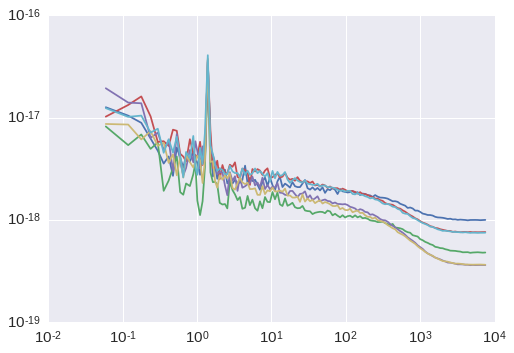

In [18]:
for k in range(6):
    loglog(records['S_frequency'][k],records['S_xx'][k])

In [381]:
records['package_temperature']

array([ 0.11396439,  0.11423108,  0.06481218,  0.06492752,  0.0644246 ,
        0.06553951])

In [20]:
files = records['stream.root_path'][:4]

In [21]:
from kid_readout.interactive import *

INFO     2016-12-21 15:37:59,740 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [24]:
sweepstreams = []
for fn in files:
    ncf = NCFile(fn)
    swa = basic.SweepArray(ncf.SweepArray0.stream_arrays+ncf.SweepArray1.stream_arrays)
    ssa = basic.SweepStreamArray(swa,ncf.StreamArray2)
    ss = ssa.sweep_stream(2)
    sweepstreams.append(ss)
    ncf.close()

In [25]:
sweepstreams

In [371]:
cross_sweepstreams = []
for k in range(8):
    ncf = NCFile(files[-1])
    swa = basic.SweepArray(ncf.SweepArray0.stream_arrays+ncf.SweepArray1.stream_arrays)
    ssa = basic.SweepStreamArray(swa,ncf.StreamArray2)
    ss = ssa.sweep_stream(k)
    cross_sweepstreams.append(ss)
    ncf.close()    

In [29]:
import sys

In [39]:
from fit_power_spectra import fitter

In [318]:
reload(fitter)
reload(fitter.models)

<module 'fit_power_spectra.models' from '/home/gjones/python/fit_power_spectra/models.pyc'>

In [57]:
def mask_below(frequency,S_xx,S_qq,S_qx,limit=2):
    return frequency >limit

In [261]:
for ss in sweepstreams:
    print "setting S"
    ss.set_S(masking_function=mask_below)
    print "running mc"
    ss.ftr = fitter.MCRedWhiteAnchoredNoiseRolloffPowerSpectrumFitter(ss.S_frequency,ss.S_xx,ss.S_counts,nwalkers=64)
    ss.ftr.make_initial_guesses()
    ss.ftr.auto_run_mcmc(initial_burn=2400,initial_samples=3000,final_burn=1000,final_samples=2000,
                        initial_ball_scale=100)
    print "setting S"
    ss.set_S()
    

setting S
running mc
MAP: -535.629293961
$N_i$ : 0.000000
$N_o$ : 0.000000
$A_1$ : 0.000000
$\alpha$ : 0.303624
$f_{3dB}$ : 608.053594
MAP: -535.621694669
$N_i$ : 0.000000
$N_o$ : 0.000000
$A_1$ : 0.000000
$\alpha$ : 0.293595
$f_{3dB}$ : 613.247385
setting S
setting S
running mc
MAP: -565.305486025
$N_i$ : 0.000000
$N_o$ : 0.000000
$A_1$ : 0.000000
$\alpha$ : 0.186497
$f_{3dB}$ : 792.714068
MAP: -565.292143194
$N_i$ : 0.000000
$N_o$ : 0.000000
$A_1$ : 0.000000
$\alpha$ : 0.186749
$f_{3dB}$ : 784.416752
setting S
setting S
running mc
MAP: -629.497897749
$N_i$ : 0.000000
$N_o$ : 0.000000
$A_1$ : 0.000000
$\alpha$ : 0.204015
$f_{3dB}$ : 628.839227
MAP: -629.491398782
$N_i$ : 0.000000
$N_o$ : 0.000000
$A_1$ : 0.000000
$\alpha$ : 0.201955
$f_{3dB}$ : 627.219636
setting S
setting S
running mc
MAP: -620.730769891
$N_i$ : 0.000000
$N_o$ : 0.000000
$A_1$ : 0.000000
$\alpha$ : 0.212637
$f_{3dB}$ : 621.257482
MAP: -620.736586643
$N_i$ : 0.000000
$N_o$ : 0.000000
$A_1$ : 0.000000
$\alpha$ : 0.2104

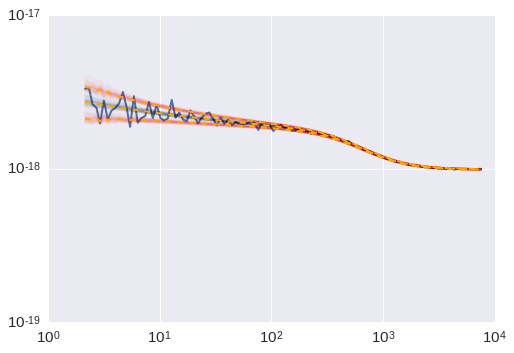

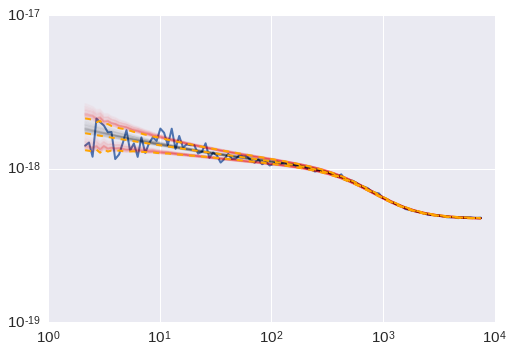

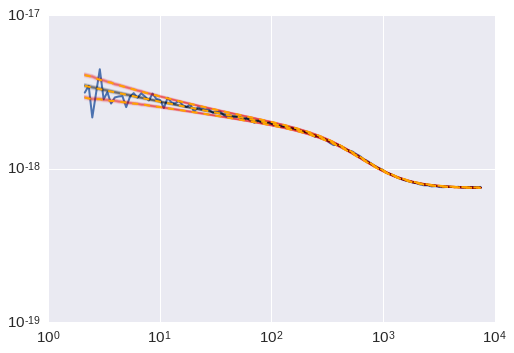

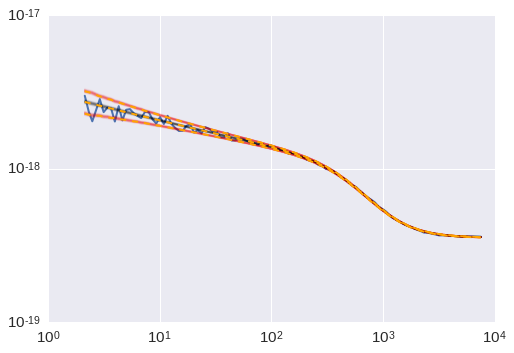

In [262]:
for ss in sweepstreams:
    _=ss.ftr.plot_results()

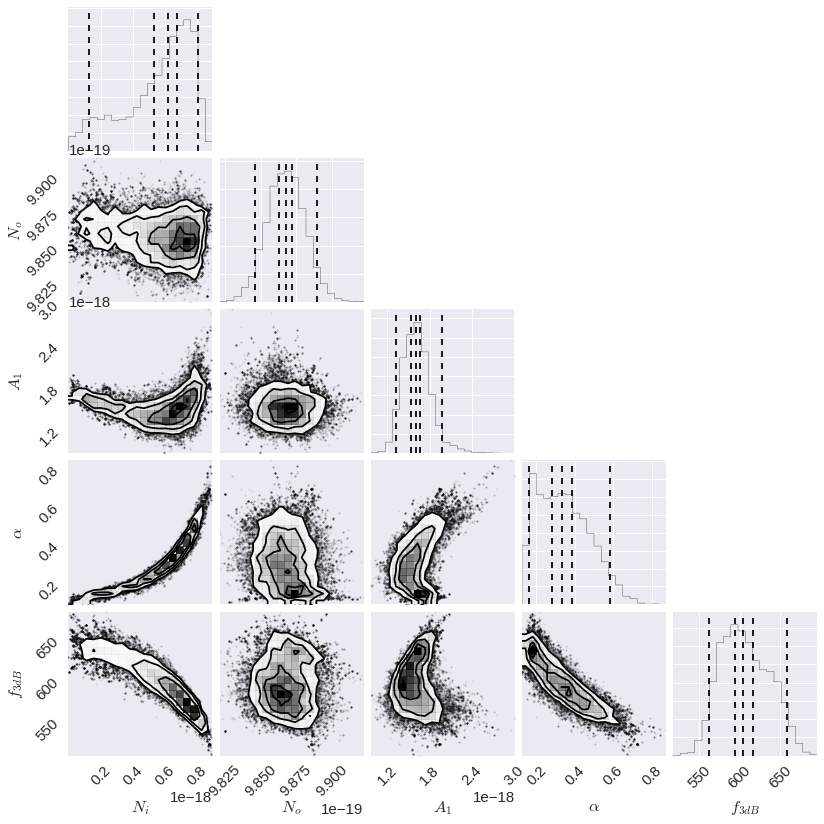

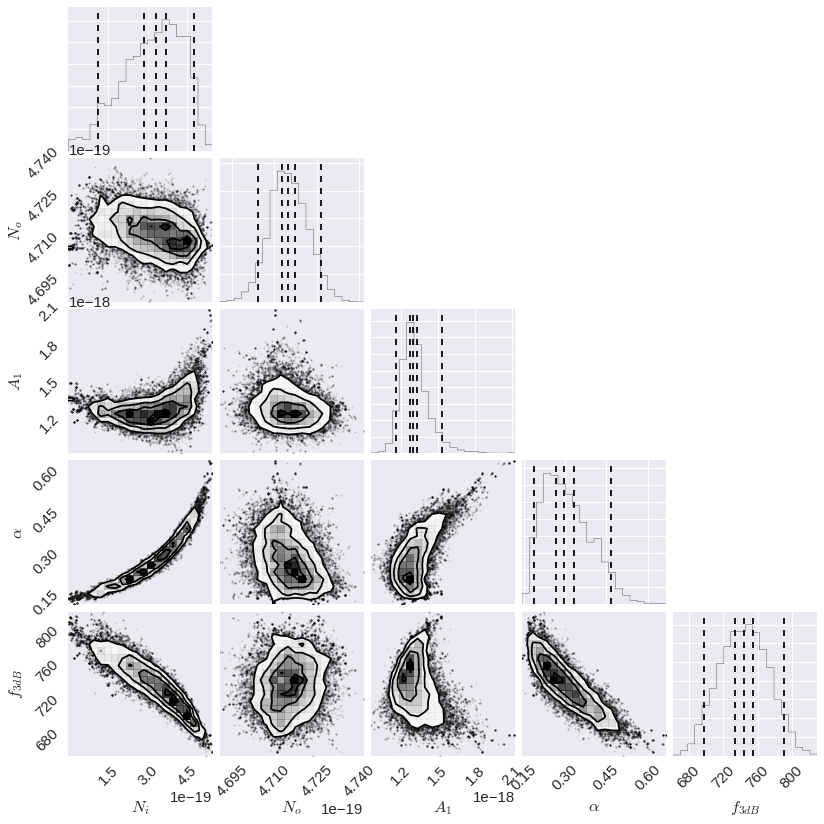

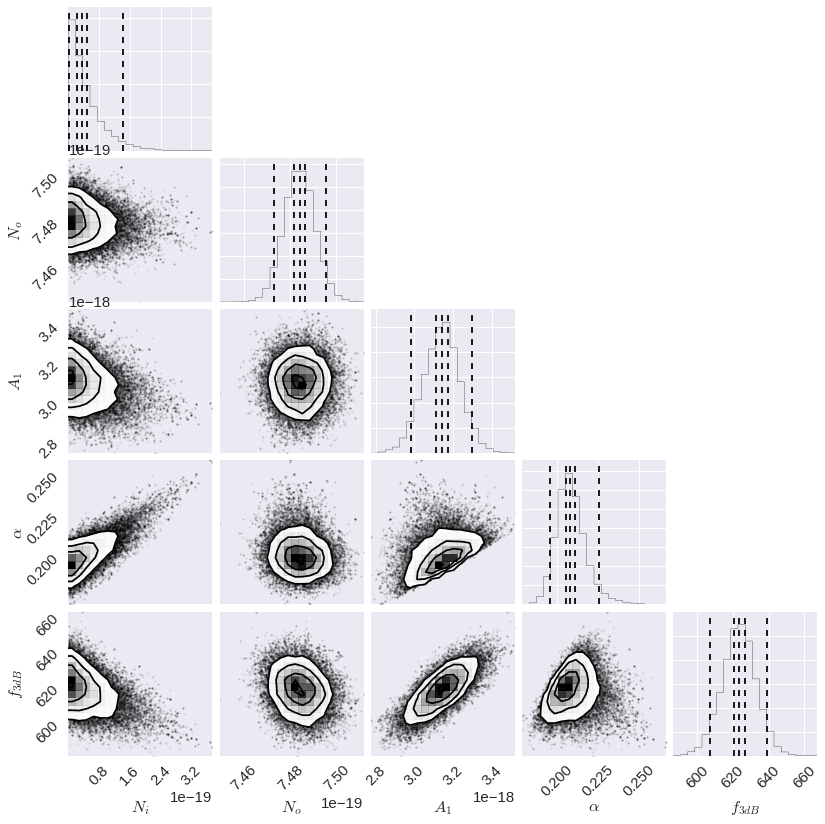

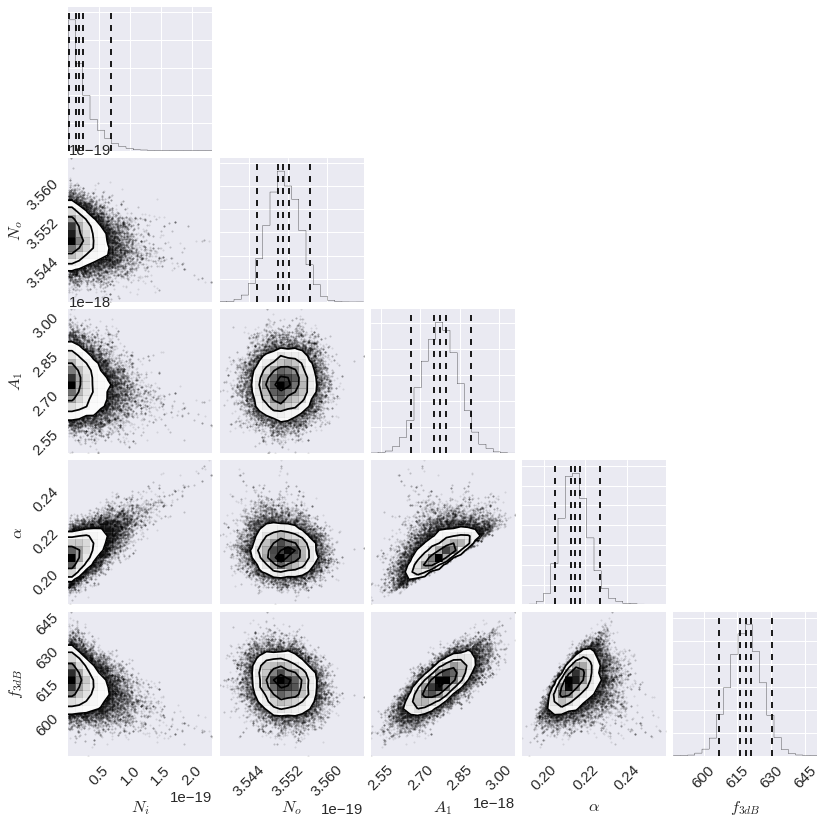

In [263]:
for ss in sweepstreams:
    _=ss.ftr.corner()

In [317]:
ftr.samples.shape

(432000, 5)

In [354]:
reload(fitter)

<module 'fit_power_spectra.fitter' from '/home/gjones/python/fit_power_spectra/fitter.py'>

In [331]:
for ss in sweepstreams:
    f= ss.resonator.f_0/(2*ss.resonator.Q)
    print f, 1e3/(2*np.pi*f)

861.036699793 0.184841067901
856.341860318 0.185854447233
811.676961383 0.196081631812
802.058454766 0.198433096922


In [382]:
for k,ss in enumerate(sweepstreams):
    ss.package_temperature = records['package_temperature'][k]

In [351]:
print '\n'.join(['%8.3g' % x for x in [1.23e-19,871.1022,.2342]])

1.23e-19
     871
   0.234


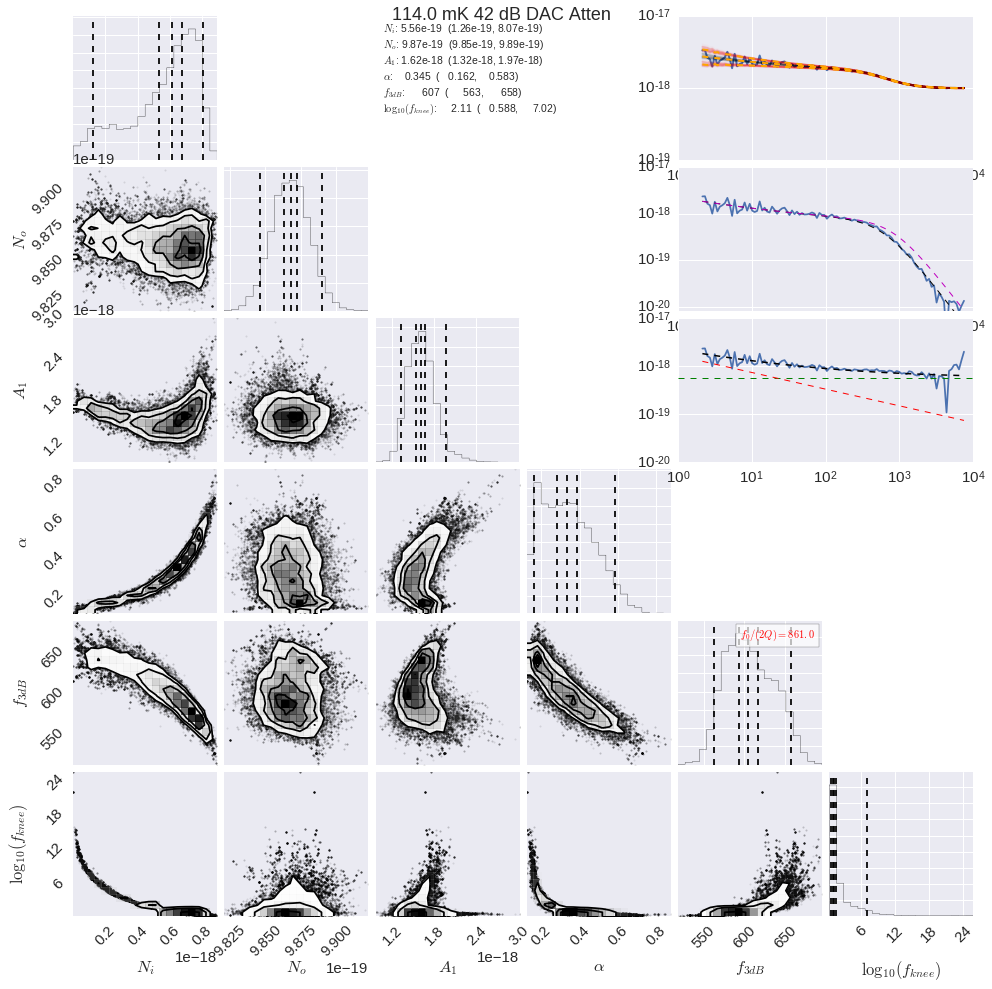

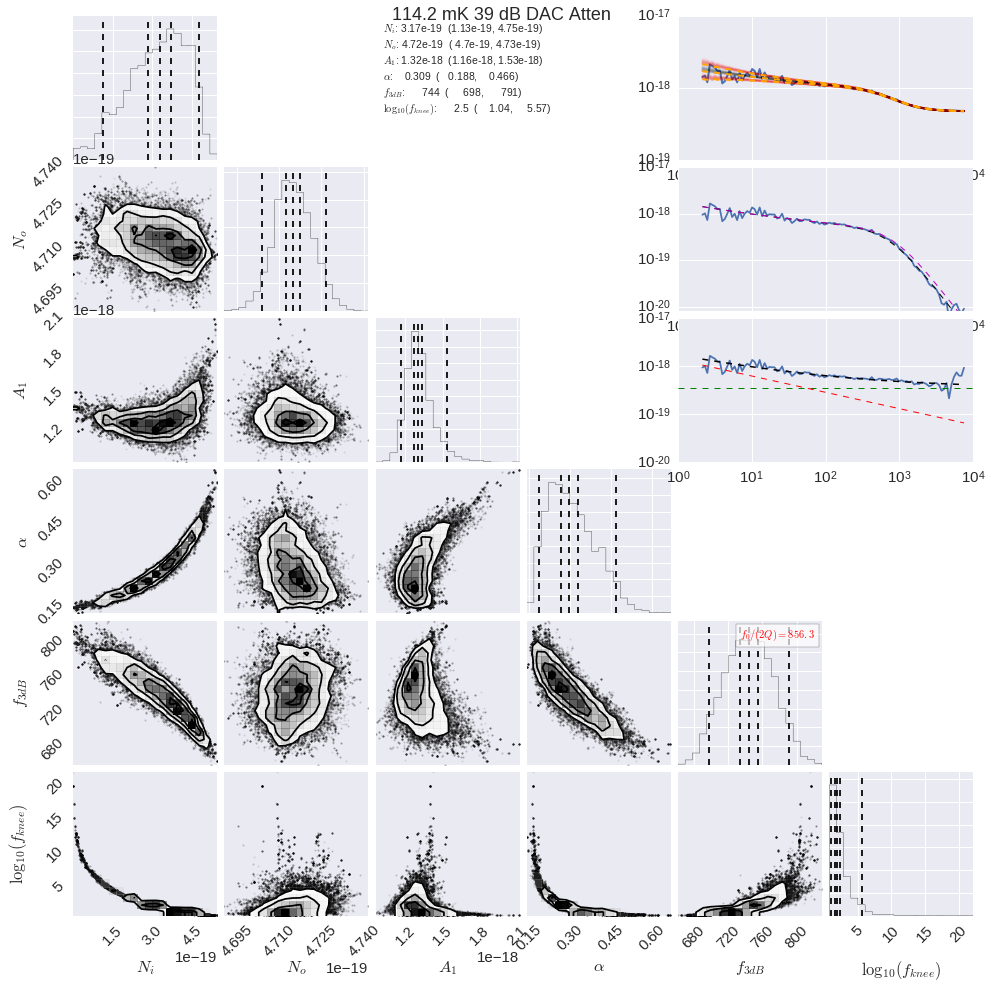

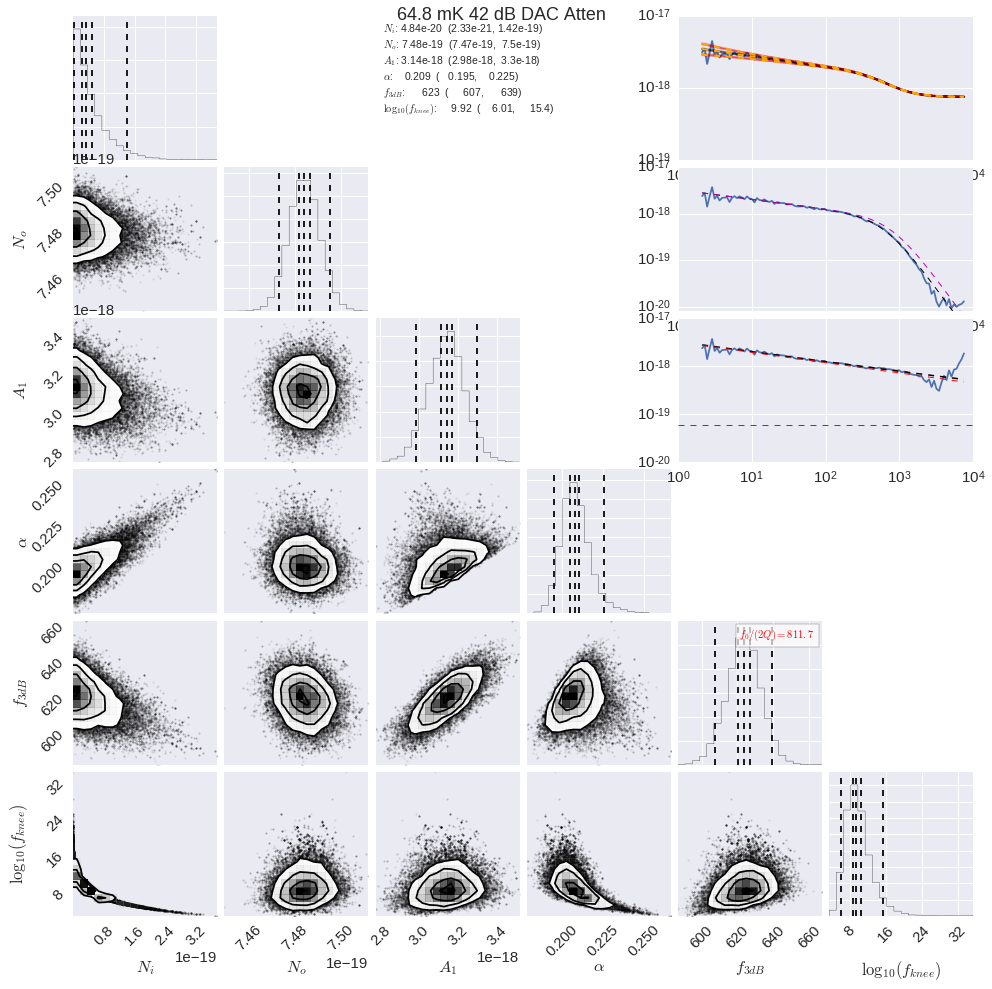

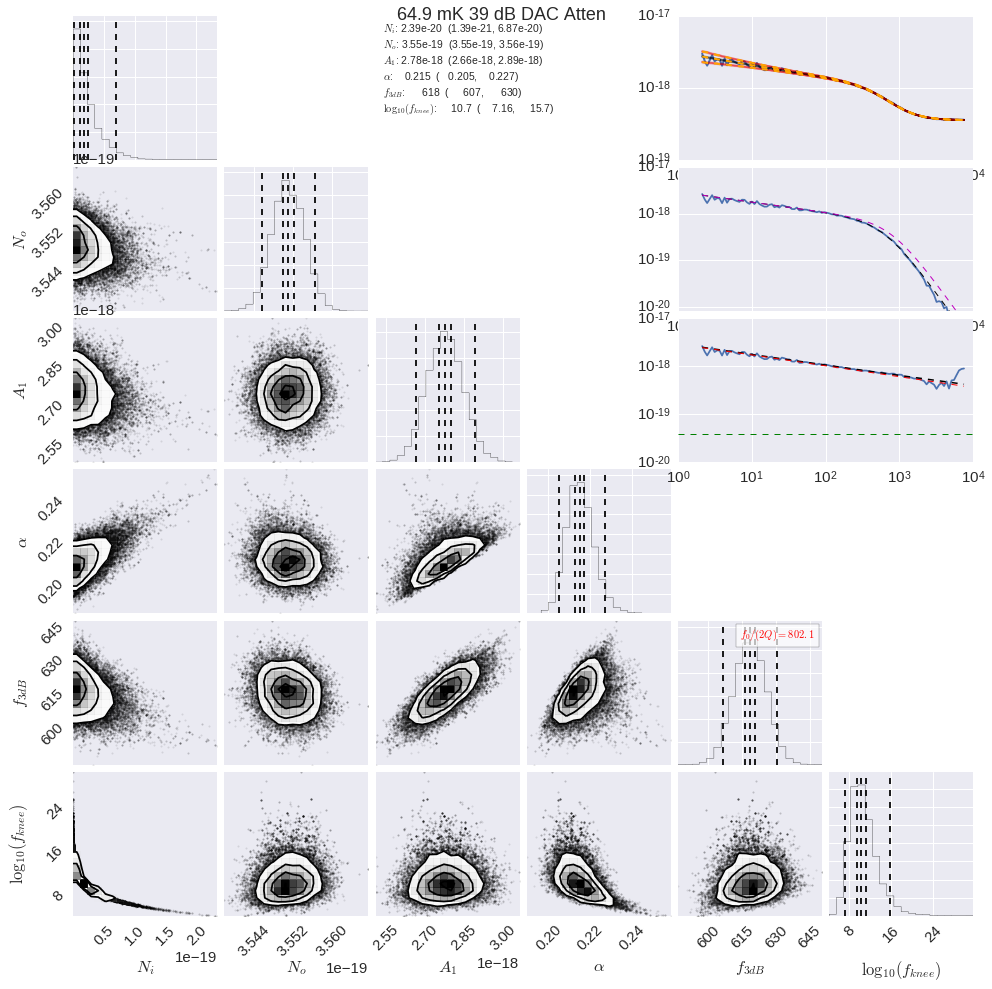

In [384]:
for k,ss in enumerate(sweepstreams):
    fig = fitter.anchored_corner(ss.ftr,f3db_nom=ss.resonator.f_0/(2*ss.resonator.Q))
    fig.suptitle('%.1f mK %.0f dB DAC Atten' % (ss.package_temperature*1000,ss.stream.roach_state.dac_attenuation))
    fig.savefig(('/home/gjones/paper_plots/noise_plot_%d.pdf' % k),bbox_inches='tight')

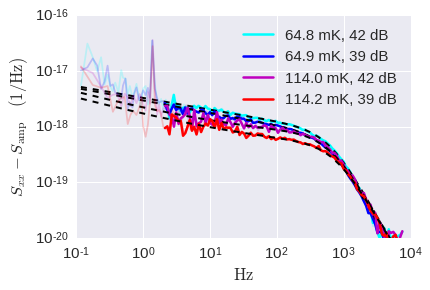

In [412]:
figure(figsize=(6,4))
for idx in [2,3,0,1]:
    ss = sweepstreams[idx]
    ftr = ss.ftr
    mask = ss.S_frequency > 0.1
    model = ftr.model.psd(ss.S_frequency[mask],*ftr.mean_params)-ss.ftr.mean_params[1]
    if ss.package_temperature > 0.1:
        if ss.stream.roach_state.dac_attenuation ==39:
            color = 'r'
        else:
            color = 'm'
    else:
        if ss.stream.roach_state.dac_attenuation ==39:
            color = 'b'
        else:
            color = 'cyan'
    loglog(ss.S_frequency[mask],ss.S_xx[mask]-ss.ftr.mean_params[1],alpha=.2,color=color)
    loglog(ss.ftr.frequency_data,ss.ftr.psd_data-ss.ftr.mean_params[1],color=color,lw=2.5,label=('%.1f mK, %.0f dB' % (ss.package_temperature*1000,
                                                                                                                     ss.stream.roach_state.dac_attenuation)))
    loglog(ss.S_frequency[mask],model,'k--',lw=2)
#yscale('linear')
ylim(1e-20,1e-16)
legend(loc='upper right',prop=dict(size='small'))
ylabel('$S_{xx}-S_{\mathrm{amp}}\quad(1/\mathrm{Hz})$')
xlabel('$\mathrm{Hz}$')
savefig('/home/gjones/paper_plots/noise_summary.pdf',bbox_inches='tight')

In [ ]:
fitter.models.remove_amp_and_rolloff()

In [426]:
ftr.model.labels

['$N_i$', '$N_o$', '$A_1$', '$\\alpha$', '$f_{3dB}$']

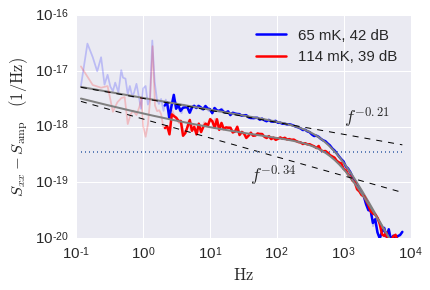

In [435]:
figure(figsize=(6,4))
for idx in [2,1]:
    ss = sweepstreams[idx]
    ftr = ss.ftr
    mask = ss.S_frequency > 0.1
    model_f = ss.S_frequency[mask]
    n_w,amp,A1,alpha,f3db = ss.ftr.mean_params
    model = ftr.model.psd(model_f,*ftr.mean_params)-amp
    red_model = fitter.models.red_white_anchored_model(model_f,A1,0,alpha)
    white_model = fitter.models.red_white_anchored_model(model_f,0,n_w,alpha)
    if ss.package_temperature > 0.1:
        if ss.stream.roach_state.dac_attenuation ==39:
            color = 'r'
        else:
            color = 'm'
    else:
        if ss.stream.roach_state.dac_attenuation ==39:
            color = 'cyan'
        else:
            color = 'b'
    loglog(ss.S_frequency[mask],ss.S_xx[mask]-ss.ftr.mean_params[1],alpha=.2,color=color)
    loglog(ss.ftr.frequency_data,ss.ftr.psd_data-ss.ftr.mean_params[1],color=color,lw=2.5,label=('%.0f mK, %.0f dB' % (ss.package_temperature*1000,
                                                                                                                     ss.stream.roach_state.dac_attenuation)))
    loglog(ss.S_frequency[mask],model,color='gray',lw=2)
    loglog(model_f,red_model,color='k',lw=1,linestyle='--')
    if ss.package_temperature > 0.1:
        loglog(model_f,white_model,':')

text(1e3,0.9e-18,('$f^{-%.2f}$' % sweepstreams[2].ftr.mean_params[3]),ha='left',va='bottom')
text(2e2,0.8e-19,('$f^{-%.2f}$' % sweepstreams[1].ftr.mean_params[3]),ha='right',va='bottom')
#text(1.5e-1,4e-19,('$f^{-%.2f}' % ss[2].ftr.mean_params[3]),ha='left',va='bottom')


#yscale('linear')
ylim(1e-20,1e-16)
legend(loc='upper right',prop=dict(size='small'))
ylabel('$S_{xx}-S_{\mathrm{amp}}\quad(1/\mathrm{Hz})$')
xlabel('$\mathrm{Hz}$')
savefig('/home/gjones/paper_plots/noise_summary_2.pdf',bbox_inches='tight')

In [401]:
ss.ftr.samples.std(0)

array([  2.28297387e-20,   3.32453822e-22,   6.99340869e-20,
         6.70851552e-03,   7.20273015e+00])

In [389]:
ss.ftr.mean_params

array([  5.65159139e-19,   9.86392046e-19,   1.65472290e-18,
         3.47407051e-01,   6.13616665e+02])

In [357]:
from kid_readout.analysis.timeseries import cross_spectrum

In [358]:
csa = cross_spectrum.CrossSpectralAnalysis()

In [385]:
x1 = cross_sweepstreams[2].x
x2 = cross_sweepstreams[4].x
x1 = x1 - x1.mean()
x2 = x2 - x2.mean()

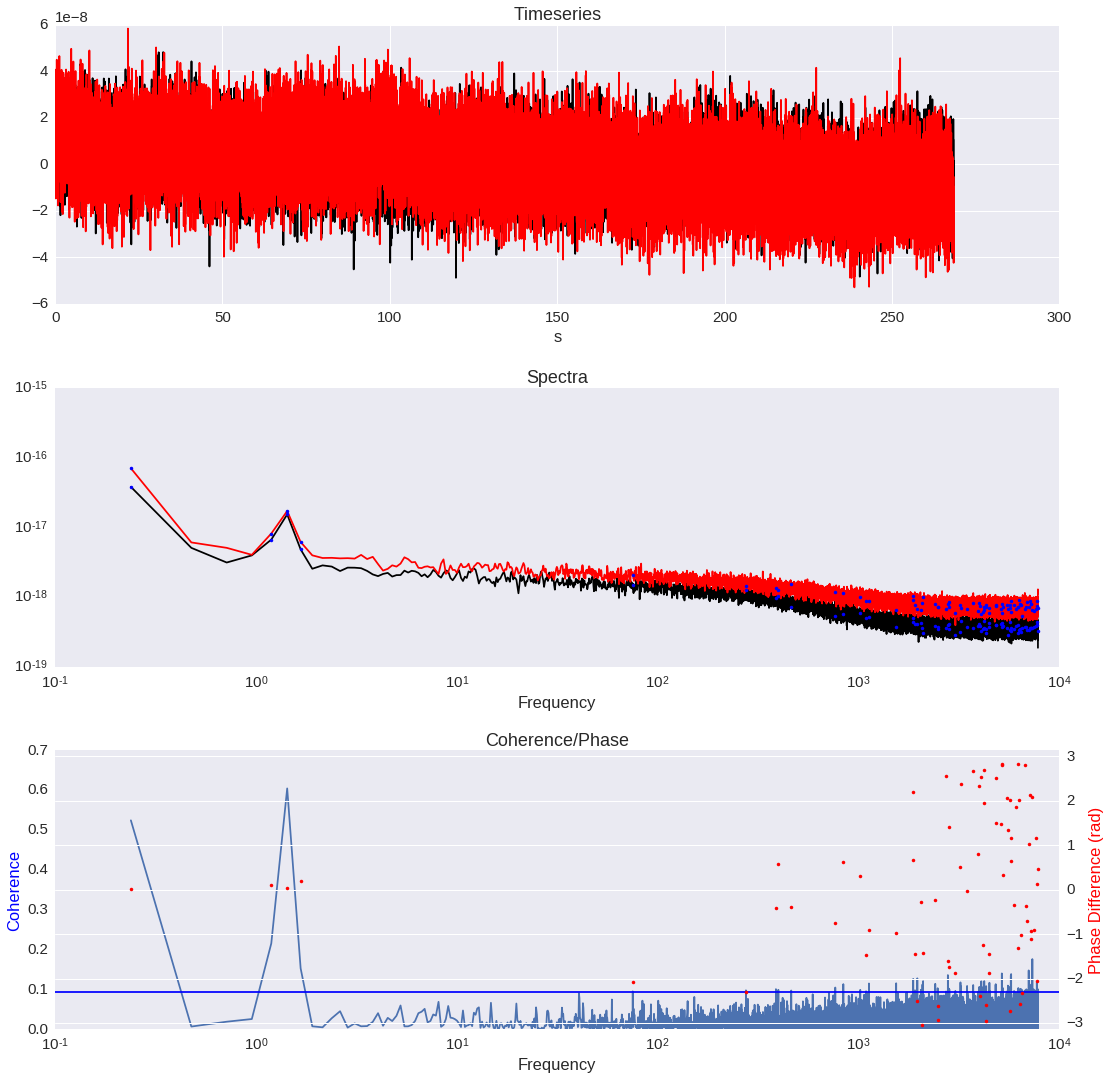

In [387]:
csa.get_data_directly(x1,x2,sample_rate=ss.stream.stream_sample_rate)
csa.calculate(NFFT=2**16)
_=csa.plot()

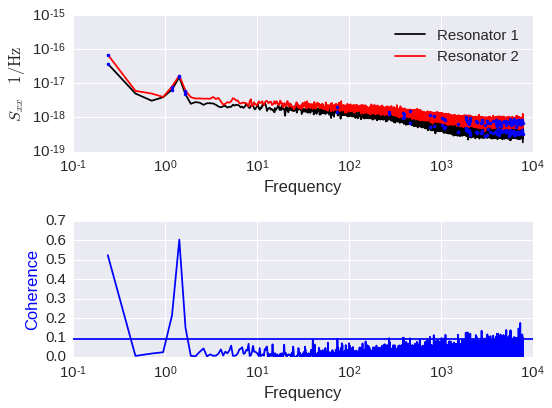

In [423]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(8,6))
ax1.loglog(csa.freq,csa.pxx1,'k',label='Resonator 1')
ax1.loglog(csa.freq,csa.pxx2,'r',label='Resonator 2')
ax1.loglog(csa.freq[csa.mask95],csa.pxx1[csa.mask95],'b.')
ax1.loglog(csa.freq[csa.mask95],csa.pxx2[csa.mask95],'b.')
ax1.set_ylabel('$S_{xx} \quad 1/\mathrm{Hz}$')
#ax1.grid()
#ax1.set_title('Spectra')
ax1.set_xlabel('Frequency')
ax1.legend(loc='upper right')


ax2.semilogx(csa.coh_freq,csa.coherence,'b')
#ax2b = plt.twinx(ax2)
ax2.axhline(csa.gamma95)
#ax2b.semilogx(csa.coh_freq[csa.mask95],csa.angle[csa.mask95],'r.')
#ax2.grid()
#ax2b.grid()
ax2.set_xlim(ax1.get_xlim())
#ax2.set_title('Coherence/Phase')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Coherence',color='blue')
#ax2b.set_ylabel('Phase Difference (rad)',color='red')
#ax2b.set_ylim(-np.pi,np.pi)
fig.tight_layout()
fig.savefig('/home/gjones/paper_plots/coherence_example.pdf',bbox_inches='tight')

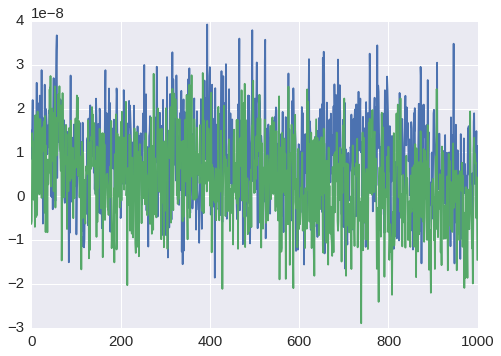

In [378]:
plot(csa.lpts1[::300][:1000])
plot(csa.lpts2[::300][:1000])


In [266]:
def remove_amp(f,pxx,nout):
    return pxx-nout
def remove_amp_and_rolloff(f,pxx,nout,f3db):
    noamp = remove_amp(f,pxx,nout)
    return noamp*(1+(f/f3db)**2)

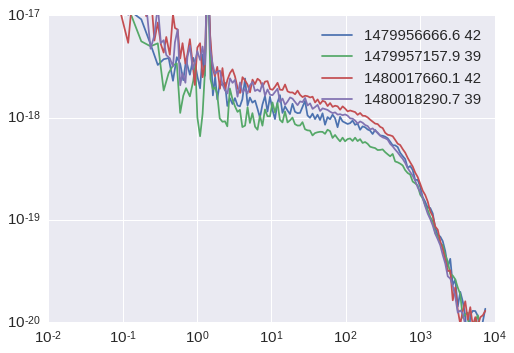

In [275]:
for ss in sweepstreams:
    ni,nout,a1,alpha,f3db = ss.ftr.mean_params
    f = ss.S_frequency
    pxx = ss.S_xx
    loglog(f,remove_amp(f,pxx,nout),label=('%.1f %d' %(ss.start_epoch(),ss.stream.roach_state.dac_attenuation)))
ylim(1e-20,1e-17)
legend()

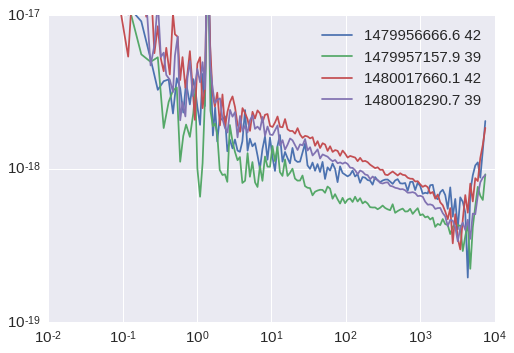

In [278]:
for ss in sweepstreams:
    ni,nout,a1,alpha,f3db = ss.ftr.mean_params
    f = ss.S_frequency
    pxx = ss.S_xx
    loglog(f,remove_amp_and_rolloff(f,pxx,nout,f3db),label=('%.1f %d' %(ss.start_epoch(),ss.stream.roach_state.dac_attenuation)))
ylim(1e-19,1e-17)
legend()

In [249]:
ss.ftr.sampler.chain.shape

(64, 3000, 5)

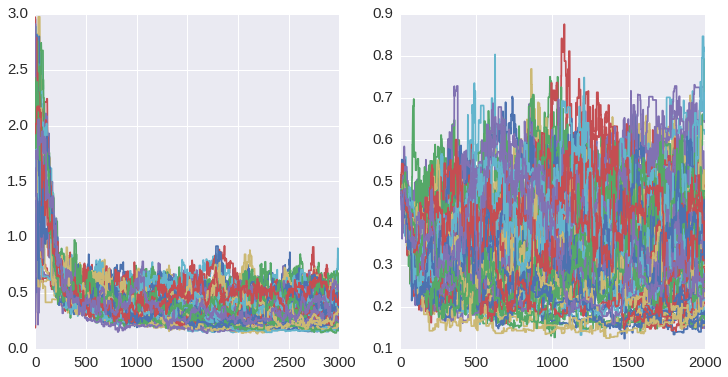

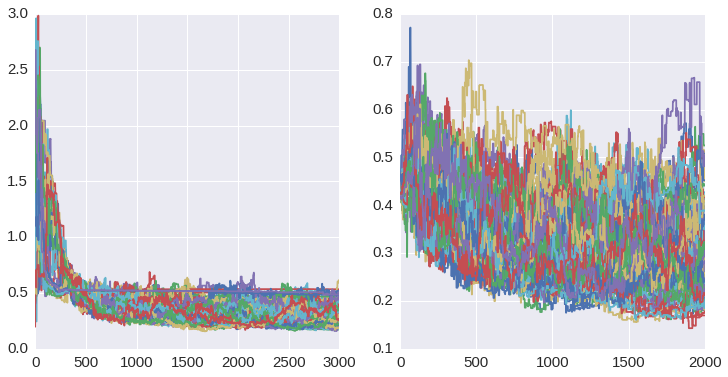

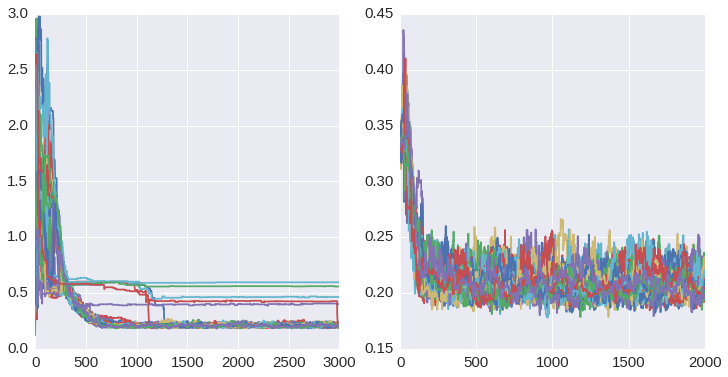

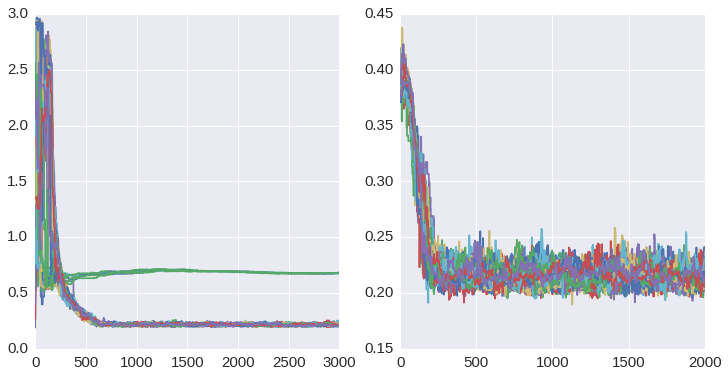

In [264]:
for ss in sweepstreams:
    fig,(ax1,ax2) = subplots(1,2,figsize=(12,6))
    _=ax1.plot(ss.ftr.initial_chain[:,:,3].T)
    _=ax2.plot(ss.ftr.sampler.chain[:,:,3].T)

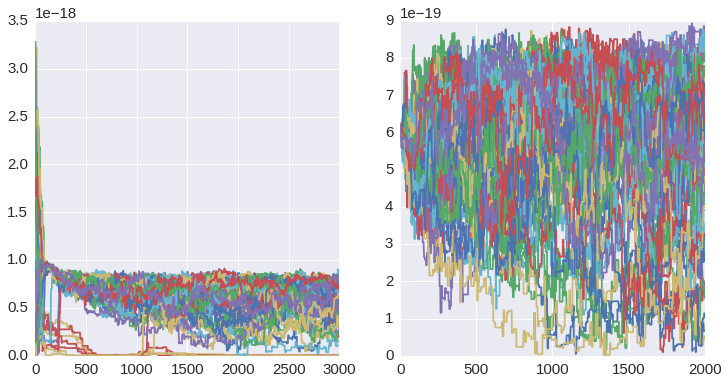

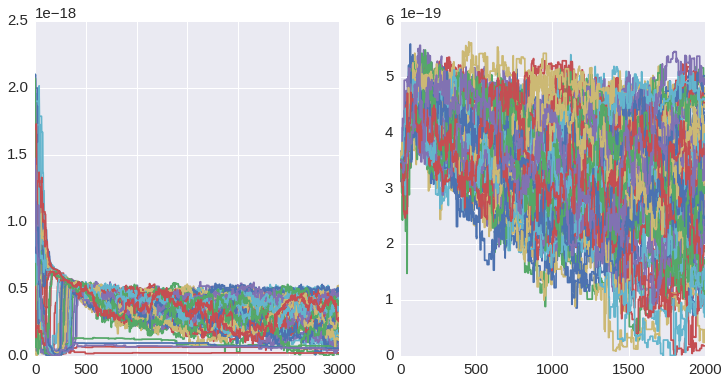

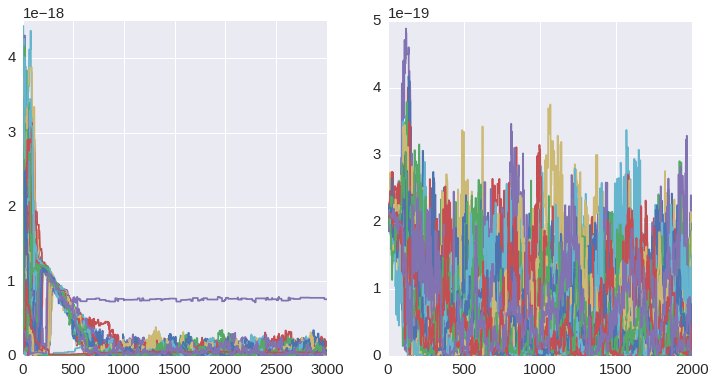

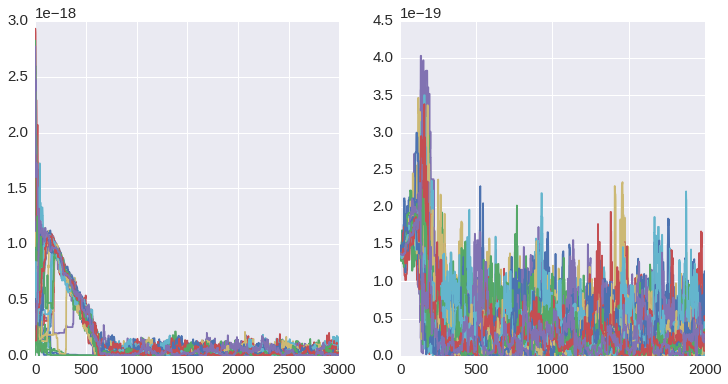

In [265]:
for ss in sweepstreams:
    fig,(ax1,ax2) = subplots(1,2,figsize=(12,6))
    _=ax1.plot(ss.ftr.initial_chain[:,:,0].T)
    _=ax2.plot(ss.ftr.sampler.chain[:,:,0].T)

In [231]:
ss.ftr.set_initial_ball??

In [237]:
ss.ftr.set_initial_ball(ss.ftr.mean_params,scale=10)

In [190]:
ftr.run_mcmc??

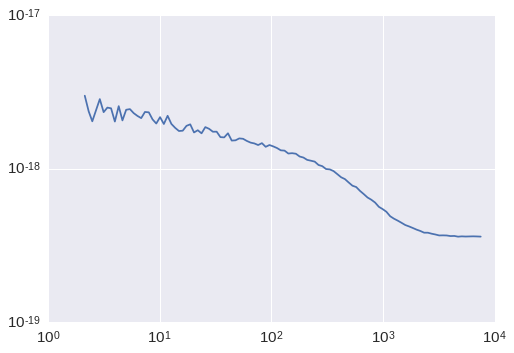

In [59]:
loglog(ss.S_frequency,ss.S_xx)

In [158]:
ftr = fitter.MCRedWhiteAnchoredNoiseRolloffPowerSpectrumFitter(ss.S_frequency,ss.S_xx*1e18,ss.S_counts)

In [159]:
ftr.make_initial_guesses()

In [160]:
ftr.limits

[(0, 2.9917120420527219),
 (0, 2.9917120420527219),
 (0, 29.917120420527219),
 (0.1, 3),
 (2.1308660507202148, 7520.0051069259644)]

In [188]:
ftr.auto_run_mcmc??

In [178]:
ftr.run_mcmc(samples=5000,burnin=500)

MAP: -620.700953426
$N_i$ : 0.000381
$N_o$ : 0.355161
$A_1$ : 2.799854
$\alpha$ : 0.212213
$f_{3dB}$ : 621.436473


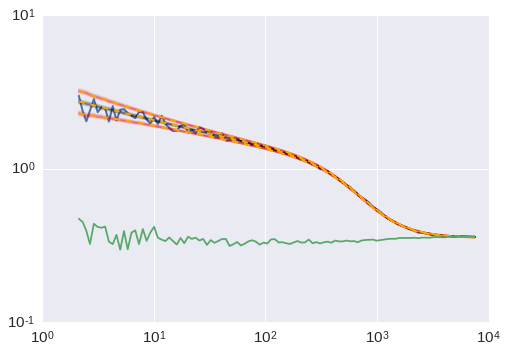

In [171]:
ftr.plot_results()
#loglog(ss.S_frequency,fitter.models.red_white_anchored_model(ss.S_frequency,2872976.905962, 0.093690, 0.226583))
loglog(ss.S_frequency,1e18*ss.S_yy)

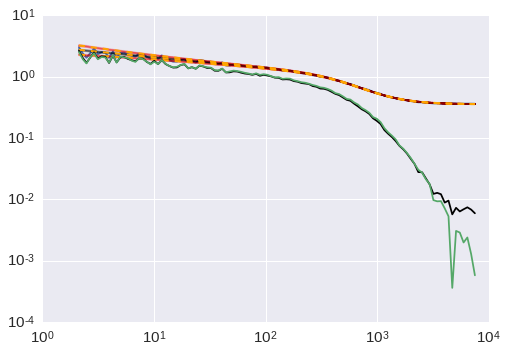

In [172]:
ftr.plot_results()
loglog(ss.S_frequency,1e18*ss.S_xx-ftr.sampler.flatchain.mean(0)[1],'k')
loglog(ss.S_frequency,1e18*(ss.S_xx-ss.S_yy))

In [154]:
ftr.sampler.flatchain.mean(0)

array([  5.31804409e-02,   3.54944687e-01,   2.75035329e+00,
         2.19967473e-01,   6.15372933e+02])

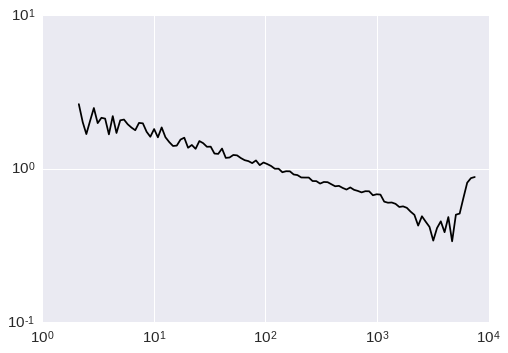

In [169]:
loglog(ss.S_frequency,(1e18*ss.S_xx-ftr.sampler.flatchain.mean(0)[1])*(1+(ss.S_frequency/ftr.sampler.flatchain.mean(0)[4])**2),'k')

In [52]:
import corner

In [111]:
ftr.limits

[(0.036097327156556336, 2.9917120420527219),
 (0, 2.9917120420527219),
 (0, 29.917120420527219),
 (0.1, 3),
 (2.1308660507202148, 7520.0051069259644)]

In [182]:
ftr.set_initial_ball(ftr.samples.mean(0))

In [183]:
ftr.run_mcmc(samples=10000,burnin=2000)

MAP: -620.700953426
$N_i$ : 0.000381
$N_o$ : 0.355161
$A_1$ : 2.799854
$\alpha$ : 0.212213
$f_{3dB}$ : 621.436473


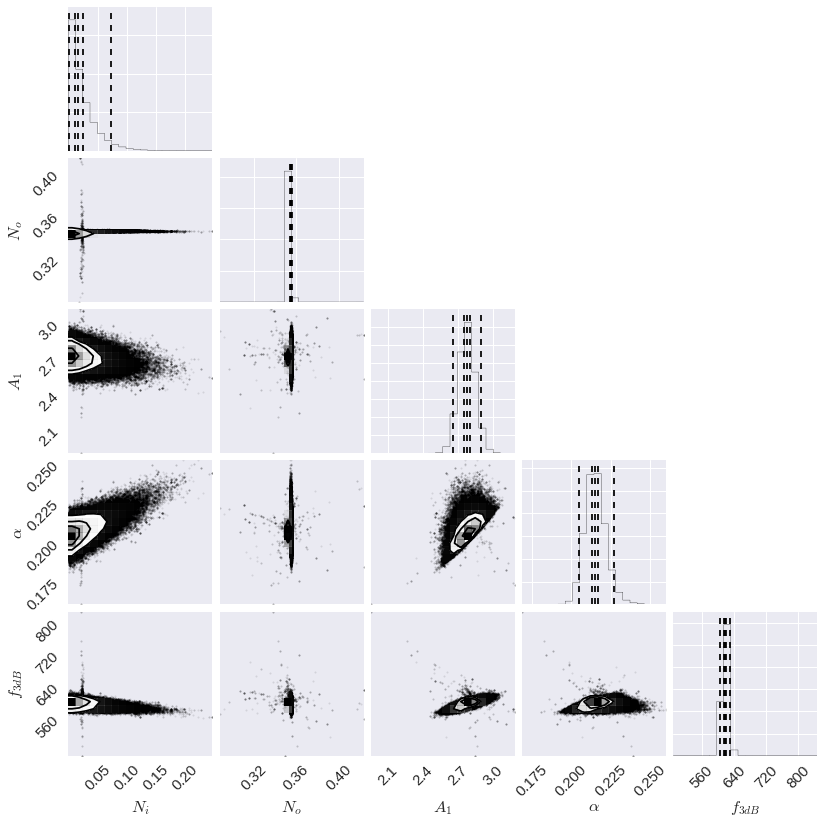

In [184]:
_=ftr.corner()

In [186]:
ftr.sampler.chain.shape

(32, 15500, 5)

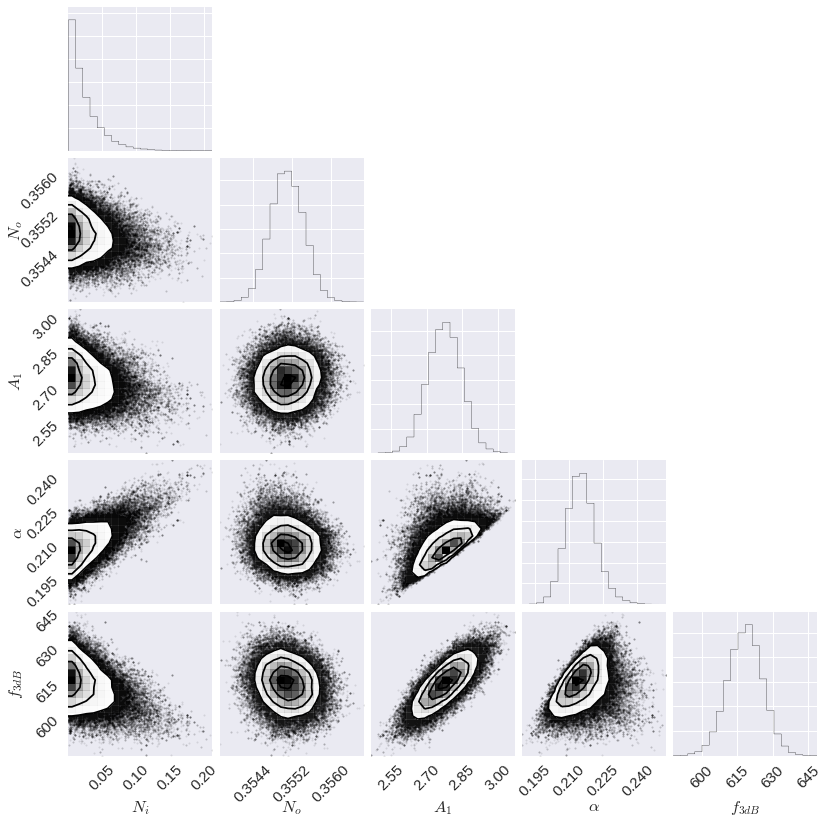

In [187]:
_=corner.corner(ftr.sampler.chain[:,-5000:,:].reshape((-1,5)),labels=ftr.model.labels)

In [82]:
ftr.map_params

array([  1.51861157e-01,   3.54779441e-01,   1.87688412e+05,
         2.36330864e-01,   6.03922801e+02])

In [ ]:
ftr.sampler.flatchain

In [85]:
ftr.sampler.flatchain.mean(0)

array([  1.71403904e-01,   3.54773965e-01,   9.06261962e+04,
         2.42508549e-01,   6.02568733e+02])

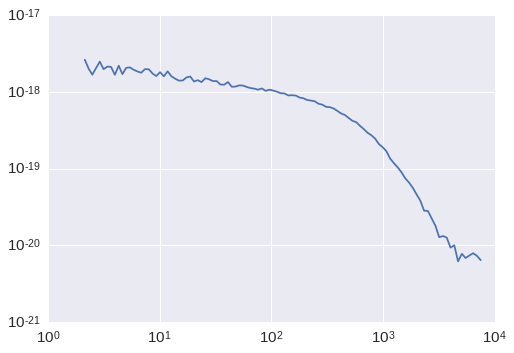

In [86]:
loglog(ss.S_frequency,ss.S_xx-ftr.sampler.flatchain.mean(0)[1]*1e-18)

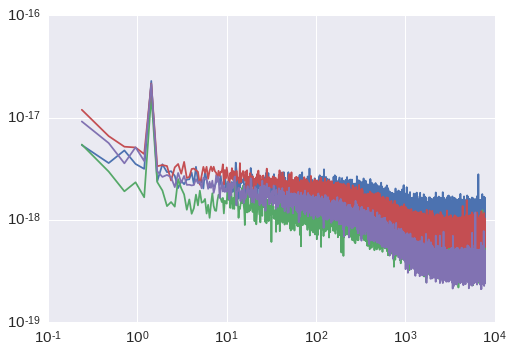

In [26]:
for ss in sweepstreams:
    ss.set_S(binned=False,NFFT=2**16)
    loglog(ss.S_frequency,ss.S_xx)